In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn import datasets
from sklearn import linear_model
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

%matplotlib inline

## Random Forest

In [2]:
def RF_Feature_selection(X, y):

    forest = ExtraTreesRegressor(n_estimators=50, random_state=0)
    forest.fit(X, y)

    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()
    return forest, indices

In [3]:
def SelectedFeatures(forest, indices):
    feature_selection_model = SelectFromModel(forest, prefit=True)
    X_selected_features_forest = feature_selection_model.transform(X)
    print(X_selected_features_forest.shape)
    X.columns[indices]

In [4]:
train=pd.read_csv('TrainClean.csv',index_col=0).reset_index(drop=True)

## Sales directly

In [5]:
X = train.drop(columns='NumberOfSales')
X = X.drop(columns='NumberOfCustomers')
y = train["NumberOfSales"]

Feature ranking:
1. feature 2 NearestCompetitor (0.445653)
2. feature 1 HasPromotions (0.160872)
3. feature 17 General (0.025563)
4. feature 14 HyperMarket (0.024603)
5. feature 41 December (0.024050)
6. feature 23 Region3 (0.023120)
7. feature 46 Monday (0.022862)
8. feature 4 Region_GDP (0.016032)
9. feature 16 ShoppingCenter (0.016021)
10. feature 3 Region_AreaKM2 (0.014442)
11. feature 45 Saturday (0.013374)
12. feature 5 Region_PopulationK (0.013274)
13. feature 13 StandardMarket (0.013137)
14. feature 15 SuperMarket (0.011701)
15. feature 8 Mean_Sea_Level_PressurehPa (0.010207)
16. feature 29 Region9 (0.008822)
17. feature 10 Mean_VisibilityKm (0.007927)
18. feature 7 Mean_Humidity (0.007827)
19. feature 27 Region7 (0.007779)
20. feature 6 Mean_Dew_PointC (0.007336)
21. feature 56 H (0.006801)
22. feature 11 Mean_Wind_SpeedKm_h (0.006778)
23. feature 9 Mean_TemperatureC (0.006522)
24. feature 57 WCI (0.006383)
25. feature 25 Region5 (0.006067)
26. feature 26 Region6 (0.005842)
27

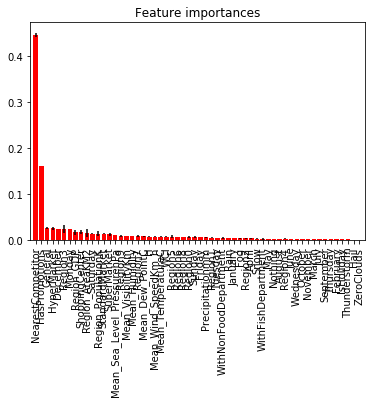

In [6]:
forest, indices = RF_Feature_selection(X, y)

In [7]:
SelectedFeatures(forest, indices)

(433958, 7)


In [8]:
X.columns[indices]

Index(['NearestCompetitor', 'HasPromotions', 'General', 'HyperMarket',
       'December', 'Region3', 'Monday', 'Region_GDP', 'ShoppingCenter',
       'Region_AreaKM2', 'Saturday', 'Region_PopulationK', 'StandardMarket',
       'SuperMarket', 'Mean_Sea_Level_PressurehPa', 'Region9',
       'Mean_VisibilityKm', 'Mean_Humidity', 'Region7', 'Mean_Dew_PointC', 'H',
       'Mean_Wind_SpeedKm_h', 'Mean_TemperatureC', 'WCI', 'Region5', 'Region6',
       'Region8', 'Region0', 'Sunday', 'Friday', 'Precipitationmm', 'Region1',
       'Tuesday', 'WithNonFoodDepartment', 'Rain', 'January', 'Fog', 'Region2',
       'April', 'Snow', 'WithFishDepartment', 'May', 'Nothing', 'August',
       'Region4', 'June', 'Wednesday', 'October', 'November', 'March', 'July',
       'September', 'Thursday', 'February', 'IsHoliday', 'Thunderstorm',
       'Hail', 'ZeroClouds'],
      dtype='object')

## Double model
### Predict Customers

In [9]:
X = train.drop(columns='NumberOfSales')
X = X.drop(columns='NumberOfCustomers')
y = train["NumberOfCustomers"]

Feature ranking:
1. feature 2 NearestCompetitor (0.424317)
2. feature 16 ShoppingCenter (0.145142)
3. feature 23 Region3 (0.087843)
4. feature 1 HasPromotions (0.040762)
5. feature 13 StandardMarket (0.036126)
6. feature 27 Region7 (0.022519)
7. feature 17 General (0.016463)
8. feature 3 Region_AreaKM2 (0.015945)
9. feature 4 Region_GDP (0.014741)
10. feature 19 WithNonFoodDepartment (0.014605)
11. feature 14 HyperMarket (0.013678)
12. feature 15 SuperMarket (0.013320)
13. feature 46 Monday (0.011370)
14. feature 41 December (0.010966)
15. feature 45 Saturday (0.009792)
16. feature 28 Region8 (0.009314)
17. feature 5 Region_PopulationK (0.008303)
18. feature 20 Region0 (0.006380)
19. feature 29 Region9 (0.006133)
20. feature 22 Region2 (0.005543)
21. feature 8 Mean_Sea_Level_PressurehPa (0.005359)
22. feature 7 Mean_Humidity (0.004976)
23. feature 24 Region4 (0.004623)
24. feature 6 Mean_Dew_PointC (0.004275)
25. feature 10 Mean_VisibilityKm (0.004200)
26. feature 9 Mean_TemperatureC (

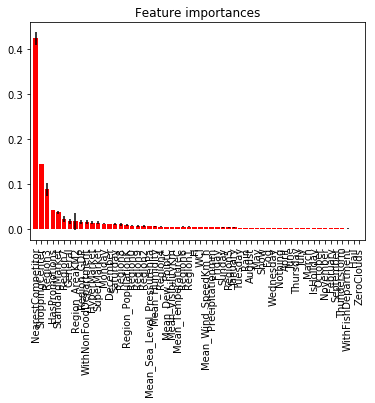

In [10]:
forest, indices = RF_Feature_selection(X, y)

In [11]:
SelectedFeatures(forest, indices)

(433958, 6)


In [12]:
X.columns[indices]

Index(['NearestCompetitor', 'ShoppingCenter', 'Region3', 'HasPromotions',
       'StandardMarket', 'Region7', 'General', 'Region_AreaKM2', 'Region_GDP',
       'WithNonFoodDepartment', 'HyperMarket', 'SuperMarket', 'Monday',
       'December', 'Saturday', 'Region8', 'Region_PopulationK', 'Region0',
       'Region9', 'Region2', 'Mean_Sea_Level_PressurehPa', 'Mean_Humidity',
       'Region4', 'Mean_Dew_PointC', 'Mean_VisibilityKm', 'Mean_TemperatureC',
       'Region6', 'Region1', 'H', 'WCI', 'Mean_Wind_SpeedKm_h',
       'Precipitationmm', 'Friday', 'Sunday', 'Region5', 'January', 'Tuesday',
       'Rain', 'August', 'May', 'Snow', 'Fog', 'Wednesday', 'Nothing', 'April',
       'June', 'Thursday', 'July', 'March', 'IsHoliday', 'October', 'November',
       'February', 'September', 'Thunderstorm', 'WithFishDepartment', 'Hail',
       'ZeroClouds'],
      dtype='object')

### Predict Sales

In [13]:
X = train.drop(columns='NumberOfSales')
y = train["NumberOfSales"]

Feature ranking:
1. feature 58 NumberOfCustomers (0.647291)
2. feature 1 HasPromotions (0.136635)
3. feature 2 NearestCompetitor (0.049730)
4. feature 13 StandardMarket (0.035301)
5. feature 46 Monday (0.013201)
6. feature 17 General (0.012965)
7. feature 41 December (0.009249)
8. feature 3 Region_AreaKM2 (0.008568)
9. feature 23 Region3 (0.007763)
10. feature 4 Region_GDP (0.005910)
11. feature 5 Region_PopulationK (0.005821)
12. feature 19 WithNonFoodDepartment (0.004334)
13. feature 14 HyperMarket (0.003839)
14. feature 22 Region2 (0.003606)
15. feature 16 ShoppingCenter (0.003364)
16. feature 45 Saturday (0.003163)
17. feature 29 Region9 (0.003054)
18. feature 15 SuperMarket (0.002766)
19. feature 26 Region6 (0.002374)
20. feature 25 Region5 (0.002277)
21. feature 27 Region7 (0.002131)
22. feature 20 Region0 (0.002060)
23. feature 18 WithFishDepartment (0.001965)
24. feature 8 Mean_Sea_Level_PressurehPa (0.001695)
25. feature 10 Mean_VisibilityKm (0.001620)
26. feature 7 Mean_Humid

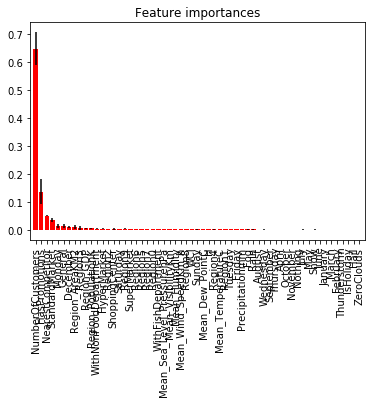

In [14]:
forest, indices = RF_Feature_selection(X, y)

In [15]:
SelectedFeatures(forest, indices)

(433958, 4)


In [16]:
X.columns[indices]

Index(['NumberOfCustomers', 'HasPromotions', 'NearestCompetitor',
       'StandardMarket', 'Monday', 'General', 'December', 'Region_AreaKM2',
       'Region3', 'Region_GDP', 'Region_PopulationK', 'WithNonFoodDepartment',
       'HyperMarket', 'Region2', 'ShoppingCenter', 'Saturday', 'Region9',
       'SuperMarket', 'Region6', 'Region5', 'Region7', 'Region0',
       'WithFishDepartment', 'Mean_Sea_Level_PressurehPa', 'Mean_VisibilityKm',
       'Mean_Humidity', 'Mean_Wind_SpeedKm_h', 'Region8', 'WCI', 'Sunday',
       'Mean_Dew_PointC', 'H', 'Region4', 'Mean_TemperatureC', 'Region1',
       'Tuesday', 'Friday', 'Precipitationmm', 'Fog', 'Rain', 'August',
       'Wednesday', 'September', 'Thursday', 'April', 'October', 'November',
       'Nothing', 'July', 'May', 'Snow', 'June', 'January', 'March',
       'February', 'Thunderstorm', 'IsHoliday', 'Hail', 'ZeroClouds'],
      dtype='object')